Import biblioteki **TensorFlow** ([https://www.tensorflow.org/](https://www.tensorflow.org/)) z której będziemy korzystali w **uczeniu maszynowym**:

In [125]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [126]:
import keras
from keras.models import Sequential
from keras.layers import Dense

**Dwa gangi**

Przetesuj poniższe instrukcje:

In [127]:
[2]*12

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

In [128]:
[-3]*10+[4]*5

[-3, -3, -3, -3, -3, -3, -3, -3, -3, -3, 4, 4, 4, 4, 4]

In [129]:
np.append([1,2,3],[4,5])

array([1, 2, 3, 4, 5])

Przygotowujemy zbiór danych:

In [130]:
x_label1 = np.random.normal(3, 1, 1000)
y_label1 = np.random.normal(2, 1, 1000)
x_label2 = np.random.normal(7, 1, 1000)
y_label2 = np.random.normal(6, 1, 1000)

xs = np.append(x_label1, x_label2) #tablica wsp. x dla 2000 punktów
ys = np.append(y_label1, y_label2) #tablica wsp. y dla 2000 punktów
labels = np.asarray([0.]*len(x_label1)+[1.]*len(x_label2))

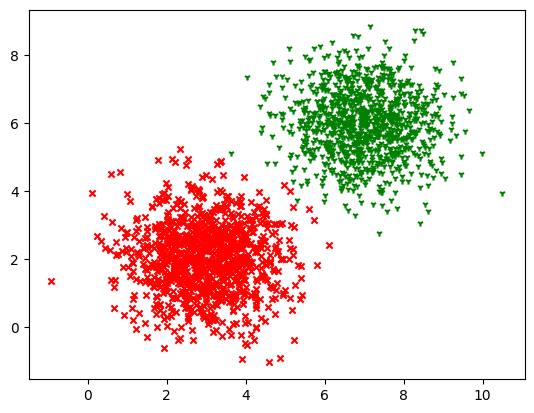

In [131]:
plt.scatter(x_label1, y_label1, c='r', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='1', s=20)
plt.show()

##Wersja podstawowa

Definiujemy model:

In [132]:
model = Sequential()

Dodajemy **jedną warstwę** (Dense) z **jednym neuronem** (units=1) z **biasem** (use_bias=True) i **liniową funkcją aktywacji** (activation="linear"):

In [133]:
model.add(Dense(units = 1, use_bias=True, input_dim=2, activation = "sigmoid"))

Definiujemy **optymalizator** i **błąd** (entropia krzyżowa). **Współczynnik uczenia = 0.1**

In [134]:
#opt = tf.keras.optimizers.Adam(learning_rate=0.1)
opt = tf.keras.optimizers.SGD(learning_rate=0.1)

In [135]:
model.compile(loss='binary_crossentropy',optimizer=opt)

Informacja o modelu:

In [136]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Przygotowanie danych:

In [137]:
xs[0:10].reshape(-1,1)

array([[3.6552444 ],
       [4.48335868],
       [3.16803826],
       [2.83961866],
       [1.8784655 ],
       [3.45971985],
       [2.71106667],
       [3.16673227],
       [4.60943899],
       [4.46992573]])

In [138]:
xs=xs.reshape(-1,1)
ys=ys.reshape(-1,1)
data_points=np.concatenate([xs,ys],axis=1)
data_points

array([[3.6552444 , 1.76714728],
       [4.48335868, 3.05201951],
       [3.16803826, 2.91245684],
       ...,
       [7.30751572, 5.85924988],
       [6.92047086, 6.74493881],
       [7.56260447, 4.96002013]])

Proces **uczenia**:

In [139]:
epochs = 100
h = model.fit(data_points,labels, verbose=1, epochs=epochs)

Epoch 1/100
63/63 [==============================] - 0s 2ms/step - loss: 0.5679
Epoch 2/100
63/63 [==============================] - 0s 2ms/step - loss: 0.3955
Epoch 3/100
63/63 [==============================] - 0s 2ms/step - loss: 0.3161
Epoch 4/100
63/63 [==============================] - 0s 2ms/step - loss: 0.2619
Epoch 5/100
63/63 [==============================] - 0s 2ms/step - loss: 0.2249
Epoch 6/100
63/63 [==============================] - 0s 2ms/step - loss: 0.1973
Epoch 7/100
63/63 [==============================] - 0s 2ms/step - loss: 0.1758
Epoch 8/100
63/63 [==============================] - 0s 2ms/step - loss: 0.1591
Epoch 9/100
63/63 [==============================] - 0s 2ms/step - loss: 0.1456
Epoch 10/100
63/63 [==============================] - 0s 2ms/step - loss: 0.1341
Epoch 11/100
63/63 [==============================] - 0s 2ms/step - loss: 0.1254
Epoch 12/100
63/63 [==============================] - 0s 2ms/step - loss: 0.1172
Epoch 13/100
63/63 [=================

In [140]:
Loss = h.history['loss']
Loss

[0.5678999423980713,
 0.39548128843307495,
 0.3161279261112213,
 0.26193666458129883,
 0.22492215037345886,
 0.19732242822647095,
 0.17579485476016998,
 0.15907897055149078,
 0.14562050998210907,
 0.13413764536380768,
 0.12535114586353302,
 0.1172439306974411,
 0.11018703132867813,
 0.10382194817066193,
 0.09867160767316818,
 0.09420301020145416,
 0.08963708579540253,
 0.08605930954217911,
 0.08280999958515167,
 0.07961374521255493,
 0.07670560479164124,
 0.0740566998720169,
 0.0719037875533104,
 0.06953880935907364,
 0.06761759519577026,
 0.06571730226278305,
 0.0639101192355156,
 0.062095463275909424,
 0.060693223029375076,
 0.059203002601861954,
 0.05764227733016014,
 0.05641934648156166,
 0.05517268925905228,
 0.0539286807179451,
 0.052981700748205185,
 0.051836978644132614,
 0.05089550092816353,
 0.04990819841623306,
 0.04897118732333183,
 0.048022929579019547,
 0.047290097922086716,
 0.046480726450681686,
 0.04586770758032799,
 0.04512612521648407,
 0.04437927529215813,
 0.043485

Sprawdźmy jakie są **wartości wag**:

In [141]:
weights = model.get_weights()

print(weights[0])
print(weights[1])    #bias

[[1.1798693]
 [1.3720845]]
[-11.223719]


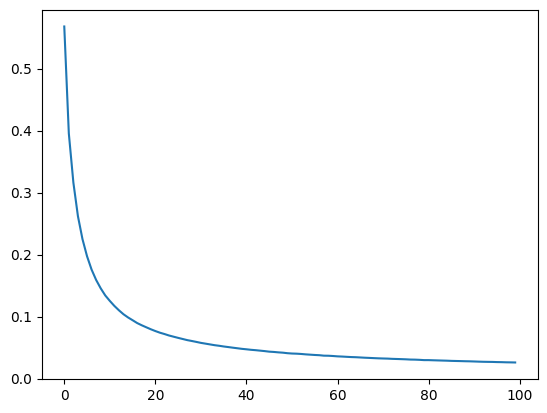

In [142]:
plt.plot(Loss)
plt.show()

Sprawdzamy działanie modelu dla punktu o współrzędnych **x** i **y**:

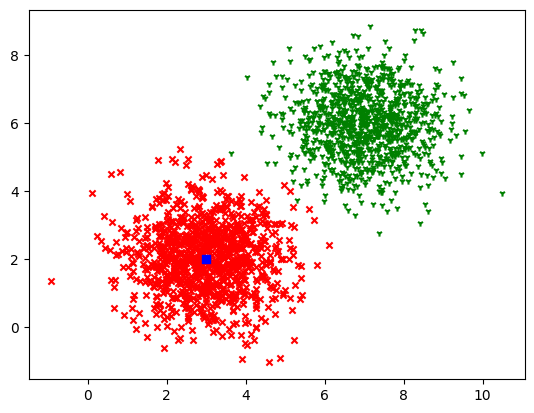

1/1 [==============================] - 0s 63ms/step


array([[0.00710419]], dtype=float32)

In [143]:
x=3.0
y=2.0
plt.scatter(x_label1, y_label1, c='r', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='1', s=20)
plt.scatter(x,y,c='b', marker='s')
plt.show()
model.predict([[x,y]])

Liczba epok 50

In [144]:
model = Sequential()

In [145]:
model.add(Dense(units = 1, use_bias=True, input_dim=2, activation = "sigmoid"))

In [146]:
#opt = tf.keras.optimizers.Adam(learning_rate=0.1)
opt = tf.keras.optimizers.SGD(learning_rate=0.1)

In [147]:
model.compile(loss='binary_crossentropy',optimizer=opt)

In [148]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [149]:
xs[0:10].reshape(-1,1)

array([[3.6552444 ],
       [4.48335868],
       [3.16803826],
       [2.83961866],
       [1.8784655 ],
       [3.45971985],
       [2.71106667],
       [3.16673227],
       [4.60943899],
       [4.46992573]])

In [150]:
xs=xs.reshape(-1,1)
ys=ys.reshape(-1,1)
data_points=np.concatenate([xs,ys],axis=1)
data_points

array([[3.6552444 , 1.76714728],
       [4.48335868, 3.05201951],
       [3.16803826, 2.91245684],
       ...,
       [7.30751572, 5.85924988],
       [6.92047086, 6.74493881],
       [7.56260447, 4.96002013]])

In [151]:
epochs = 50
h = model.fit(data_points,labels, verbose=1, epochs=epochs)

Epoch 1/50
63/63 [==============================] - 0s 2ms/step - loss: 0.5515
Epoch 2/50
63/63 [==============================] - 0s 2ms/step - loss: 0.3759
Epoch 3/50
63/63 [==============================] - 0s 2ms/step - loss: 0.3039
Epoch 4/50
63/63 [==============================] - 0s 2ms/step - loss: 0.2531
Epoch 5/50
63/63 [==============================] - 0s 2ms/step - loss: 0.2191
Epoch 6/50
63/63 [==============================] - 0s 3ms/step - loss: 0.1933
Epoch 7/50
63/63 [==============================] - 0s 3ms/step - loss: 0.1730
Epoch 8/50
63/63 [==============================] - 0s 2ms/step - loss: 0.1568
Epoch 9/50
63/63 [==============================] - 0s 3ms/step - loss: 0.1434
Epoch 10/50
63/63 [==============================] - 0s 3ms/step - loss: 0.1326
Epoch 11/50
63/63 [==============================] - 0s 2ms/step - loss: 0.1239
Epoch 12/50
63/63 [==============================] - 0s 2ms/step - loss: 0.1154
Epoch 13/50
63/63 [==============================

In [152]:
Loss = h.history['loss']
Loss

[0.5514559745788574,
 0.37589436769485474,
 0.30392253398895264,
 0.25305691361427307,
 0.21908478438854218,
 0.1932816207408905,
 0.17304490506649017,
 0.15681524574756622,
 0.14344017207622528,
 0.13260763883590698,
 0.12385395169258118,
 0.11542092263698578,
 0.10901965200901031,
 0.10257185250520706,
 0.09792258590459824,
 0.09340578317642212,
 0.08933097869157791,
 0.08550417423248291,
 0.08192317932844162,
 0.07893263548612595,
 0.07638262957334518,
 0.07367561012506485,
 0.07151411473751068,
 0.06906156986951828,
 0.06696797162294388,
 0.06528440117835999,
 0.06353318691253662,
 0.061711035668849945,
 0.060197532176971436,
 0.05881044268608093,
 0.05751041695475578,
 0.05620032548904419,
 0.05482563376426697,
 0.05382918938994408,
 0.052831731736660004,
 0.051722679287195206,
 0.05071362853050232,
 0.04988562688231468,
 0.04881628602743149,
 0.04801720753312111,
 0.04717530682682991,
 0.04633312299847603,
 0.045607224106788635,
 0.044752947986125946,
 0.04406304284930229,
 0.043

In [153]:
weights = model.get_weights()

print(weights[0])
print(weights[1])    #bias

[[0.9366239]
 [1.1662605]]
[-9.12026]


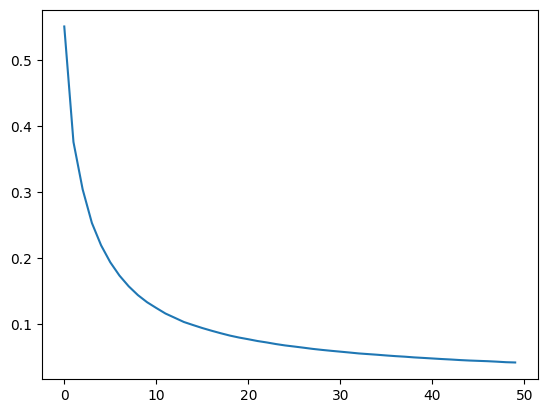

In [154]:
plt.plot(Loss)
plt.show()

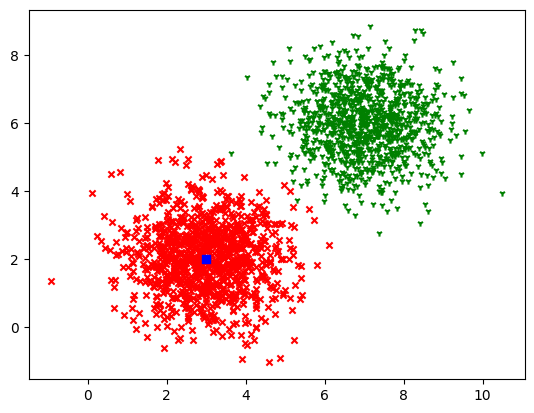

1/1 [==============================] - 0s 57ms/step


array([[0.01838133]], dtype=float32)

In [155]:
x=3.0
y=2.0
plt.scatter(x_label1, y_label1, c='r', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='1', s=20)
plt.scatter(x,y,c='b', marker='s')
plt.show()
model.predict([[x,y]])

Liczba epok 150

In [156]:
model = Sequential()

In [157]:
model.add(Dense(units = 1, use_bias=True, input_dim=2, activation = "sigmoid"))

In [158]:
#opt = tf.keras.optimizers.Adam(learning_rate=0.1)
opt = tf.keras.optimizers.SGD(learning_rate=0.1)

In [159]:
model.compile(loss='binary_crossentropy',optimizer=opt)

In [160]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [161]:
xs[0:10].reshape(-1,1)

array([[3.6552444 ],
       [4.48335868],
       [3.16803826],
       [2.83961866],
       [1.8784655 ],
       [3.45971985],
       [2.71106667],
       [3.16673227],
       [4.60943899],
       [4.46992573]])

In [162]:
xs=xs.reshape(-1,1)
ys=ys.reshape(-1,1)
data_points=np.concatenate([xs,ys],axis=1)
data_points

array([[3.6552444 , 1.76714728],
       [4.48335868, 3.05201951],
       [3.16803826, 2.91245684],
       ...,
       [7.30751572, 5.85924988],
       [6.92047086, 6.74493881],
       [7.56260447, 4.96002013]])

In [163]:
epochs = 150
h = model.fit(data_points,labels, verbose=1, epochs=epochs)

Epoch 1/150
63/63 [==============================] - 0s 2ms/step - loss: 0.5902
Epoch 2/150
63/63 [==============================] - 0s 2ms/step - loss: 0.3816
Epoch 3/150
63/63 [==============================] - 0s 2ms/step - loss: 0.3030
Epoch 4/150
63/63 [==============================] - 0s 2ms/step - loss: 0.2546
Epoch 5/150
63/63 [==============================] - 0s 2ms/step - loss: 0.2187
Epoch 6/150
63/63 [==============================] - 0s 2ms/step - loss: 0.1938
Epoch 7/150
63/63 [==============================] - 0s 2ms/step - loss: 0.1725
Epoch 8/150
63/63 [==============================] - 0s 2ms/step - loss: 0.1566
Epoch 9/150
63/63 [==============================] - 0s 2ms/step - loss: 0.1431
Epoch 10/150
63/63 [==============================] - 0s 2ms/step - loss: 0.1323
Epoch 11/150
63/63 [==============================] - 0s 2ms/step - loss: 0.1230
Epoch 12/150
63/63 [==============================] - 0s 1ms/step - loss: 0.1156
Epoch 13/150
63/63 [=================

In [164]:
Loss = h.history['loss']
Loss

[0.5902401208877563,
 0.3816404640674591,
 0.30301371216773987,
 0.2546181082725525,
 0.21867239475250244,
 0.19381164014339447,
 0.1725294589996338,
 0.15656544268131256,
 0.1431010365486145,
 0.13229185342788696,
 0.12297970056533813,
 0.11560210585594177,
 0.10907325893640518,
 0.10321962088346481,
 0.09772145003080368,
 0.09320826083421707,
 0.08923016488552094,
 0.08576000481843948,
 0.0819987878203392,
 0.07921041548252106,
 0.07655645161867142,
 0.07372399419546127,
 0.07138730585575104,
 0.06900390982627869,
 0.06708130240440369,
 0.0653378963470459,
 0.06333141028881073,
 0.06186005473136902,
 0.06034217029809952,
 0.058754812926054,
 0.05711011216044426,
 0.056308891624212265,
 0.055074311792850494,
 0.053951144218444824,
 0.05253887176513672,
 0.05184314399957657,
 0.05068919435143471,
 0.049863461405038834,
 0.04874254763126373,
 0.047958873212337494,
 0.047147203236818314,
 0.04627988487482071,
 0.04557591304183006,
 0.044867079704999924,
 0.04395342990756035,
 0.043480783

In [165]:
weights = model.get_weights()

print(weights[0])
print(weights[1])    #bias

[[1.3322845]
 [1.5147399]]
[-12.54979]


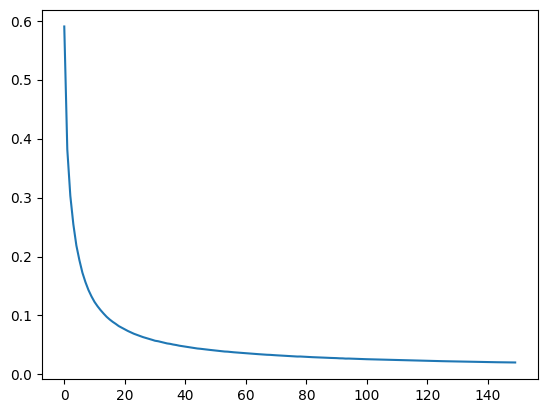

In [166]:
plt.plot(Loss)
plt.show()

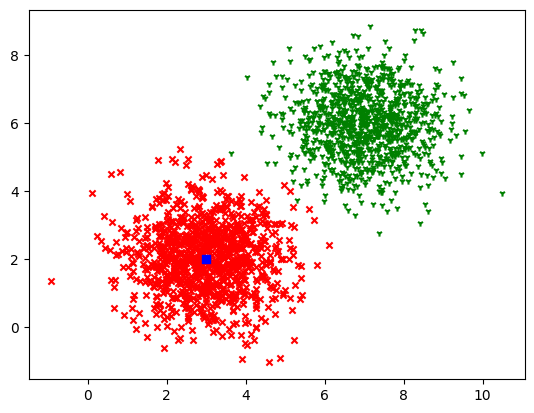

1/1 [==============================] - 0s 57ms/step


array([[0.00397615]], dtype=float32)

In [167]:
x=3.0
y=2.0
plt.scatter(x_label1, y_label1, c='r', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='1', s=20)
plt.scatter(x,y,c='b', marker='s')
plt.show()
model.predict([[x,y]])

współczynnik uczenia 0.01 (SGD)

In [168]:
model = Sequential()

In [169]:
model.add(Dense(units = 1, use_bias=True, input_dim=2, activation = "sigmoid"))

In [170]:
#opt = tf.keras.optimizers.Adam(learning_rate=0.1)
opt = tf.keras.optimizers.SGD(learning_rate=0.01)

In [171]:
model.compile(loss='binary_crossentropy',optimizer=opt)

In [172]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [173]:
xs[0:10].reshape(-1,1)

array([[3.6552444 ],
       [4.48335868],
       [3.16803826],
       [2.83961866],
       [1.8784655 ],
       [3.45971985],
       [2.71106667],
       [3.16673227],
       [4.60943899],
       [4.46992573]])

In [174]:
xs=xs.reshape(-1,1)
ys=ys.reshape(-1,1)
data_points=np.concatenate([xs,ys],axis=1)
data_points

array([[3.6552444 , 1.76714728],
       [4.48335868, 3.05201951],
       [3.16803826, 2.91245684],
       ...,
       [7.30751572, 5.85924988],
       [6.92047086, 6.74493881],
       [7.56260447, 4.96002013]])

In [175]:
epochs = 100
h = model.fit(data_points,labels, verbose=1, epochs=epochs)

Epoch 1/100
63/63 [==============================] - 1s 3ms/step - loss: 0.8962
Epoch 2/100
63/63 [==============================] - 0s 3ms/step - loss: 0.6431
Epoch 3/100
63/63 [==============================] - 0s 3ms/step - loss: 0.5972
Epoch 4/100
63/63 [==============================] - 0s 2ms/step - loss: 0.5596
Epoch 5/100
63/63 [==============================] - 0s 2ms/step - loss: 0.5287
Epoch 6/100
63/63 [==============================] - 0s 2ms/step - loss: 0.5027
Epoch 7/100
63/63 [==============================] - 0s 2ms/step - loss: 0.4811
Epoch 8/100
63/63 [==============================] - 0s 3ms/step - loss: 0.4619
Epoch 9/100
63/63 [==============================] - 0s 3ms/step - loss: 0.4455
Epoch 10/100
63/63 [==============================] - 0s 2ms/step - loss: 0.4305
Epoch 11/100
63/63 [==============================] - 0s 2ms/step - loss: 0.4178
Epoch 12/100
63/63 [==============================] - 0s 2ms/step - loss: 0.4056
Epoch 13/100
63/63 [=================

In [176]:
Loss = h.history['loss']
Loss

[0.8962318897247314,
 0.6430747509002686,
 0.5972104072570801,
 0.5595943927764893,
 0.5286520719528198,
 0.5026587843894958,
 0.4810537099838257,
 0.46194374561309814,
 0.4455479681491852,
 0.43051889538764954,
 0.4177596867084503,
 0.4055574834346771,
 0.39442387223243713,
 0.3839835822582245,
 0.3745209574699402,
 0.3657049238681793,
 0.35670554637908936,
 0.3485909700393677,
 0.340772807598114,
 0.3335612118244171,
 0.3266458511352539,
 0.3200240731239319,
 0.3134460151195526,
 0.3074128031730652,
 0.3013570010662079,
 0.29578179121017456,
 0.29021796584129333,
 0.28510165214538574,
 0.27976781129837036,
 0.27499574422836304,
 0.27027931809425354,
 0.26559650897979736,
 0.26119476556777954,
 0.2569583058357239,
 0.2527886927127838,
 0.24871297180652618,
 0.24505950510501862,
 0.2411756068468094,
 0.23771420121192932,
 0.23403947055339813,
 0.23067164421081543,
 0.22743365168571472,
 0.22421933710575104,
 0.22108790278434753,
 0.21801164746284485,
 0.21521519124507904,
 0.2123273611

In [177]:
weights = model.get_weights()

print(weights[0])
print(weights[1])    #bias

[[0.42270604]
 [0.772689  ]]
[-4.849731]


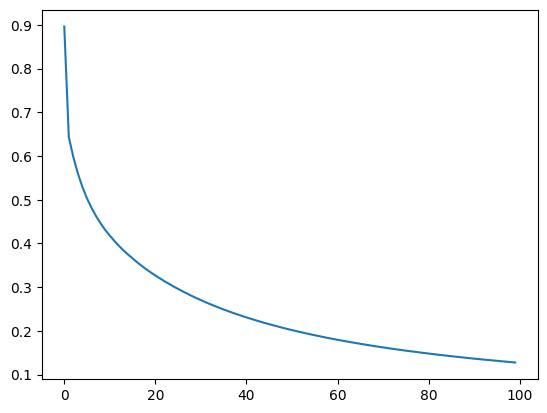

In [178]:
plt.plot(Loss)
plt.show()

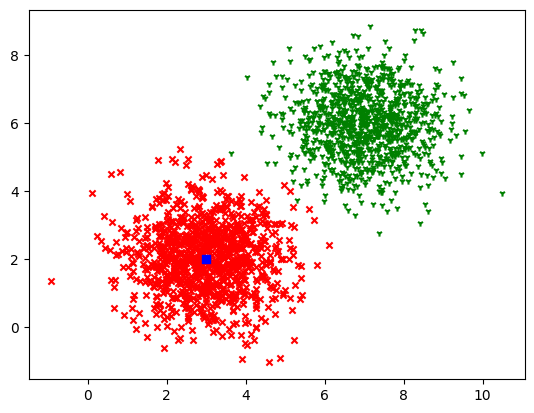

1/1 [==============================] - 0s 59ms/step


array([[0.11545069]], dtype=float32)

In [179]:
x=3.0
y=2.0
plt.scatter(x_label1, y_label1, c='r', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='1', s=20)
plt.scatter(x,y,c='b', marker='s')
plt.show()
model.predict([[x,y]])

współczynnik uczenia 0.01 (Adam)

In [180]:
model = Sequential()

In [181]:
model.add(Dense(units = 1, use_bias=True, input_dim=2, activation = "sigmoid"))

In [182]:
opt = tf.keras.optimizers.Adam(learning_rate=0.1)
#opt = tf.keras.optimizers.SGD(learning_rate=0.1)

In [183]:
model.compile(loss='binary_crossentropy',optimizer=opt)

In [184]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [185]:
xs[0:10].reshape(-1,1)

array([[3.6552444 ],
       [4.48335868],
       [3.16803826],
       [2.83961866],
       [1.8784655 ],
       [3.45971985],
       [2.71106667],
       [3.16673227],
       [4.60943899],
       [4.46992573]])

In [186]:
xs=xs.reshape(-1,1)
ys=ys.reshape(-1,1)
data_points=np.concatenate([xs,ys],axis=1)
data_points

array([[3.6552444 , 1.76714728],
       [4.48335868, 3.05201951],
       [3.16803826, 2.91245684],
       ...,
       [7.30751572, 5.85924988],
       [6.92047086, 6.74493881],
       [7.56260447, 4.96002013]])

In [187]:
epochs = 100
h = model.fit(data_points,labels, verbose=1, epochs=epochs)

Epoch 1/100
63/63 [==============================] - 1s 2ms/step - loss: 0.4890
Epoch 2/100
63/63 [==============================] - 0s 2ms/step - loss: 0.1668
Epoch 3/100
63/63 [==============================] - 0s 2ms/step - loss: 0.0977
Epoch 4/100
63/63 [==============================] - 0s 2ms/step - loss: 0.0691
Epoch 5/100
63/63 [==============================] - 0s 2ms/step - loss: 0.0548
Epoch 6/100
63/63 [==============================] - 0s 2ms/step - loss: 0.0438
Epoch 7/100
63/63 [==============================] - 0s 3ms/step - loss: 0.0370
Epoch 8/100
63/63 [==============================] - 0s 2ms/step - loss: 0.0322
Epoch 9/100
63/63 [==============================] - 0s 3ms/step - loss: 0.0284
Epoch 10/100
63/63 [==============================] - 0s 2ms/step - loss: 0.0254
Epoch 11/100
63/63 [==============================] - 0s 2ms/step - loss: 0.0235
Epoch 12/100
63/63 [==============================] - 0s 2ms/step - loss: 0.0219
Epoch 13/100
63/63 [=================

In [188]:
Loss = h.history['loss']
Loss

[0.4890337884426117,
 0.16681089997291565,
 0.09769634157419205,
 0.06910508871078491,
 0.054813504219055176,
 0.04381133243441582,
 0.03703330457210541,
 0.032150838524103165,
 0.028399460017681122,
 0.025367846712470055,
 0.023540083318948746,
 0.021889062598347664,
 0.019770381972193718,
 0.018205326050519943,
 0.01829514093697071,
 0.016514984890818596,
 0.015250531025230885,
 0.015079062432050705,
 0.014026378281414509,
 0.013320612721145153,
 0.012786499224603176,
 0.01227876078337431,
 0.012855945155024529,
 0.011374608613550663,
 0.011251767165958881,
 0.010275655426084995,
 0.01007969118654728,
 0.010154200717806816,
 0.009727513417601585,
 0.009633864276111126,
 0.00931781716644764,
 0.0090735899284482,
 0.008955618366599083,
 0.008404468186199665,
 0.008182053454220295,
 0.008407872170209885,
 0.00804576650261879,
 0.008058309555053711,
 0.007750147022306919,
 0.007696719374507666,
 0.007702833507210016,
 0.008204082027077675,
 0.007610319182276726,
 0.007542072795331478,
 0

In [189]:
weights = model.get_weights()

print(weights[0])
print(weights[1])    #bias

[[3.2493508]
 [4.0460324]]
[-32.107903]


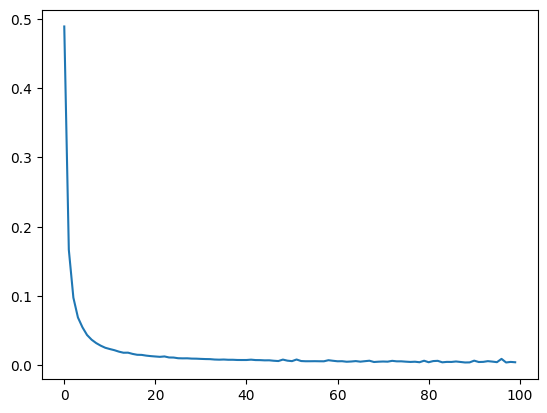

In [190]:
plt.plot(Loss)
plt.show()

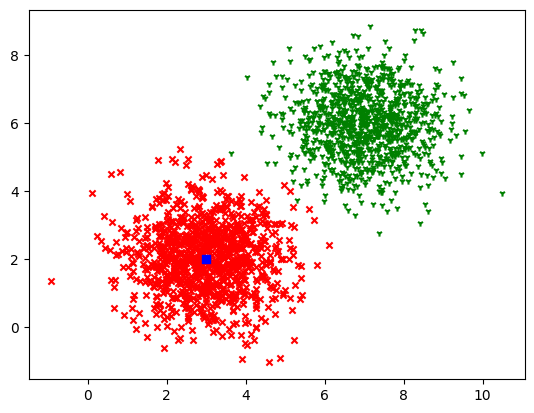

1/1 [==============================] - 0s 58ms/step


array([[6.361797e-07]], dtype=float32)

In [191]:
x=3.0
y=2.0
plt.scatter(x_label1, y_label1, c='r', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='1', s=20)
plt.scatter(x,y,c='b', marker='s')
plt.show()
model.predict([[x,y]])

Batch 100

In [192]:
model = Sequential()

In [193]:
model.add(Dense(units = 1, use_bias=True, input_dim=2, activation = "sigmoid"))

In [194]:
#opt = tf.keras.optimizers.Adam(learning_rate=0.1)
opt = tf.keras.optimizers.SGD(learning_rate=0.1)

In [195]:
model.compile(loss='binary_crossentropy',optimizer=opt)

In [196]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [197]:
xs[0:10].reshape(-1,1)

array([[3.6552444 ],
       [4.48335868],
       [3.16803826],
       [2.83961866],
       [1.8784655 ],
       [3.45971985],
       [2.71106667],
       [3.16673227],
       [4.60943899],
       [4.46992573]])

In [198]:
xs=xs.reshape(-1,1)
ys=ys.reshape(-1,1)
data_points=np.concatenate([xs,ys],axis=1)
data_points

array([[3.6552444 , 1.76714728],
       [4.48335868, 3.05201951],
       [3.16803826, 2.91245684],
       ...,
       [7.30751572, 5.85924988],
       [6.92047086, 6.74493881],
       [7.56260447, 4.96002013]])

In [199]:
epochs = 100
h = model.fit(data_points,labels, verbose=1, epochs=epochs,batch_size=100)

Epoch 1/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6586
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5187
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4734
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4353
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4039
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.3721
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.3467
Epoch 8/100
20/20 [==============================] - 0s 2ms/step - loss: 0.3246
Epoch 9/100
20/20 [==============================] - 0s 2ms/step - loss: 0.3035
Epoch 10/100
20/20 [==============================] - 0s 2ms/step - loss: 0.2863
Epoch 11/100
20/20 [==============================] - 0s 2ms/step - loss: 0.2705
Epoch 12/100
20/20 [==============================] - 0s 2ms/step - loss: 0.2566
Epoch 13/100
20/20 [=================

In [200]:
Loss = h.history['loss']
Loss

[0.6586166024208069,
 0.5186722278594971,
 0.4733980596065521,
 0.4352691173553467,
 0.40385836362838745,
 0.37210696935653687,
 0.3466973602771759,
 0.3246108293533325,
 0.3034946620464325,
 0.28634554147720337,
 0.27049490809440613,
 0.25659382343292236,
 0.24431967735290527,
 0.2326863706111908,
 0.2223537266254425,
 0.21292929351329803,
 0.20471587777137756,
 0.19621898233890533,
 0.18912580609321594,
 0.18237976729869843,
 0.17646074295043945,
 0.17031864821910858,
 0.16511519253253937,
 0.15985862910747528,
 0.15558761358261108,
 0.15103848278522491,
 0.14689438045024872,
 0.14313578605651855,
 0.13937148451805115,
 0.13584478199481964,
 0.1330467313528061,
 0.129659041762352,
 0.126979261636734,
 0.12391950935125351,
 0.12165840715169907,
 0.11899839341640472,
 0.11658500880002975,
 0.11434198915958405,
 0.11224552243947983,
 0.11004822701215744,
 0.10809243470430374,
 0.10624081641435623,
 0.10431782901287079,
 0.10258261859416962,
 0.10077068954706192,
 0.09917806833982468,
 0

In [201]:
weights = model.get_weights()

print(weights[0])
print(weights[1])    #bias

[[0.7890133]
 [1.0396947]]
[-7.7969418]


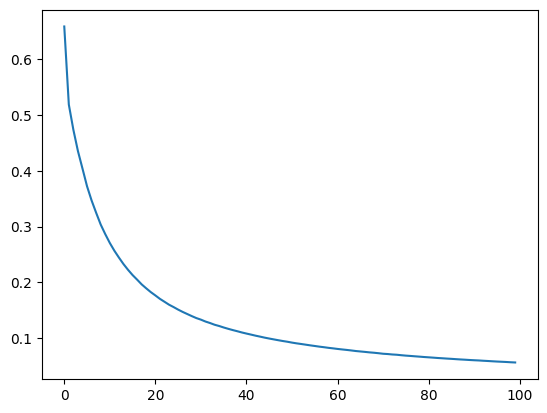

In [202]:
plt.plot(Loss)
plt.show()

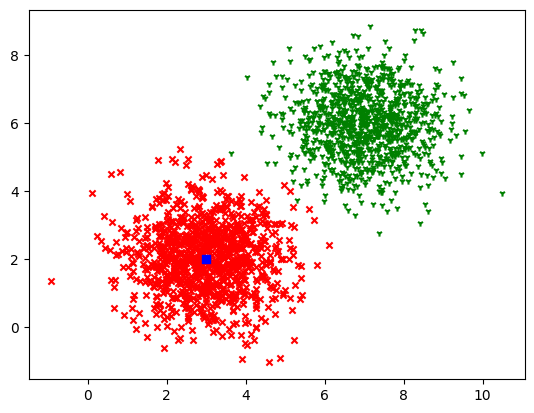

1/1 [==============================] - 0s 66ms/step


array([[0.03387839]], dtype=float32)

In [203]:
x=3.0
y=2.0
plt.scatter(x_label1, y_label1, c='r', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='1', s=20)
plt.scatter(x,y,c='b', marker='s')
plt.show()
model.predict([[x,y]])

Batch 200

In [204]:
model = Sequential()

In [205]:
model.add(Dense(units = 1, use_bias=True, input_dim=2, activation = "sigmoid"))

In [206]:
#opt = tf.keras.optimizers.Adam(learning_rate=0.1)
opt = tf.keras.optimizers.SGD(learning_rate=0.1)

In [207]:
model.compile(loss='binary_crossentropy',optimizer=opt)

In [208]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [209]:
xs[0:10].reshape(-1,1)

array([[3.6552444 ],
       [4.48335868],
       [3.16803826],
       [2.83961866],
       [1.8784655 ],
       [3.45971985],
       [2.71106667],
       [3.16673227],
       [4.60943899],
       [4.46992573]])

In [210]:
xs=xs.reshape(-1,1)
ys=ys.reshape(-1,1)
data_points=np.concatenate([xs,ys],axis=1)
data_points

array([[3.6552444 , 1.76714728],
       [4.48335868, 3.05201951],
       [3.16803826, 2.91245684],
       ...,
       [7.30751572, 5.85924988],
       [6.92047086, 6.74493881],
       [7.56260447, 4.96002013]])

In [211]:
epochs = 100
h = model.fit(data_points,labels, verbose=1, epochs=epochs,batch_size=200)

Epoch 1/100
10/10 [==============================] - 0s 2ms/step - loss: 0.9594
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 0.5716
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 0.5375
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 0.5105
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 0.4853
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4634
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4428
Epoch 8/100
10/10 [==============================] - 0s 3ms/step - loss: 0.4239
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4070
Epoch 10/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3915
Epoch 11/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3765
Epoch 12/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3632
Epoch 13/100
10/10 [=================

In [212]:
Loss = h.history['loss']
Loss

[0.959416925907135,
 0.5715832710266113,
 0.5374730229377747,
 0.5105289816856384,
 0.48526400327682495,
 0.4633569121360779,
 0.44282323122024536,
 0.4238682985305786,
 0.4069790840148926,
 0.39152202010154724,
 0.3764776885509491,
 0.36318135261535645,
 0.3502637445926666,
 0.33882805705070496,
 0.3268471360206604,
 0.3168521821498871,
 0.3065553605556488,
 0.2981359660625458,
 0.28887441754341125,
 0.2816753685474396,
 0.2729368805885315,
 0.266141802072525,
 0.25859010219573975,
 0.2521620988845825,
 0.24610492587089539,
 0.2405044436454773,
 0.23433053493499756,
 0.22908709943294525,
 0.22432538866996765,
 0.21905258297920227,
 0.2141929268836975,
 0.20994803309440613,
 0.20562390983104706,
 0.2015785574913025,
 0.1975853592157364,
 0.19377389550209045,
 0.19049444794654846,
 0.18686655163764954,
 0.18364723026752472,
 0.1802661120891571,
 0.17723597586154938,
 0.1747717261314392,
 0.17183607816696167,
 0.16872631013393402,
 0.1661451756954193,
 0.16362173855304718,
 0.16093842685

In [213]:
weights = model.get_weights()

print(weights[0])
print(weights[1])    #bias

[[0.5618733]
 [0.8686557]]
[-5.940121]


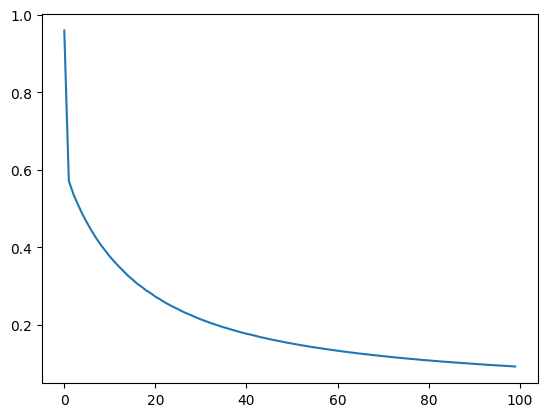

In [214]:
plt.plot(Loss)
plt.show()

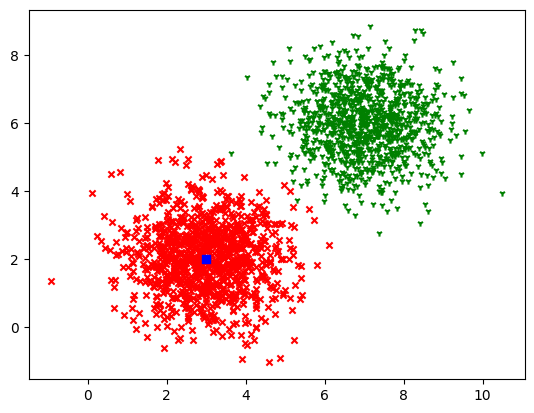

1/1 [==============================] - 0s 98ms/step


array([[0.07466185]], dtype=float32)

In [215]:
x=3.0
y=2.0
plt.scatter(x_label1, y_label1, c='r', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='1', s=20)
plt.scatter(x,y,c='b', marker='s')
plt.show()
model.predict([[x,y]])

Batch 400

In [216]:
model = Sequential()

In [217]:
model.add(Dense(units = 1, use_bias=True, input_dim=2, activation = "sigmoid"))

In [218]:
#opt = tf.keras.optimizers.Adam(learning_rate=0.1)
opt = tf.keras.optimizers.SGD(learning_rate=0.1)

In [219]:
model.compile(loss='binary_crossentropy',optimizer=opt)

In [220]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [221]:
xs[0:10].reshape(-1,1)

array([[3.6552444 ],
       [4.48335868],
       [3.16803826],
       [2.83961866],
       [1.8784655 ],
       [3.45971985],
       [2.71106667],
       [3.16673227],
       [4.60943899],
       [4.46992573]])

In [222]:
xs=xs.reshape(-1,1)
ys=ys.reshape(-1,1)
data_points=np.concatenate([xs,ys],axis=1)
data_points

array([[3.6552444 , 1.76714728],
       [4.48335868, 3.05201951],
       [3.16803826, 2.91245684],
       ...,
       [7.30751572, 5.85924988],
       [6.92047086, 6.74493881],
       [7.56260447, 4.96002013]])

In [223]:
epochs = 100
h = model.fit(data_points,labels, verbose=1, epochs=epochs,batch_size=400)

Epoch 1/100
5/5 [==============================] - 0s 4ms/step - loss: 0.6172
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 0.5910
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 0.5749
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 0.5619
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 0.5451
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 0.5310
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 0.5182
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 0.5056
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 0.4929
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 0.4820
Epoch 11/100
5/5 [==============================] - 0s 4ms/step - loss: 0.4701
Epoch 12/100
5/5 [==============================] - 0s 4ms/step - loss: 0.4596
Epoch 13/100
5/5 [==============================] - 0s 4ms/st

In [224]:
Loss = h.history['loss']
Loss

[0.6172384023666382,
 0.5910186767578125,
 0.5749366283416748,
 0.5619145035743713,
 0.5451216101646423,
 0.5310465693473816,
 0.5181615352630615,
 0.5055991411209106,
 0.49291855096817017,
 0.4820290803909302,
 0.4701005816459656,
 0.4596267342567444,
 0.4492955207824707,
 0.43982982635498047,
 0.4304950535297394,
 0.42073577642440796,
 0.4123631715774536,
 0.4037932753562927,
 0.3958814740180969,
 0.38842615485191345,
 0.38047128915786743,
 0.37334197759628296,
 0.3665776550769806,
 0.36011478304862976,
 0.35369113087654114,
 0.34738707542419434,
 0.3419177532196045,
 0.33584463596343994,
 0.32978343963623047,
 0.324537068605423,
 0.3191404342651367,
 0.3140144646167755,
 0.3093993365764618,
 0.30443692207336426,
 0.29987528920173645,
 0.29562509059906006,
 0.2909638583660126,
 0.2869267463684082,
 0.2828463613986969,
 0.27845823764801025,
 0.2745213508605957,
 0.27126604318618774,
 0.2674635648727417,
 0.26373419165611267,
 0.2601519525051117,
 0.257357656955719,
 0.2536449730396271

In [225]:
weights = model.get_weights()

print(weights[0])
print(weights[1])    #bias

[[0.3480096]
 [0.7281162]]
[-4.24621]


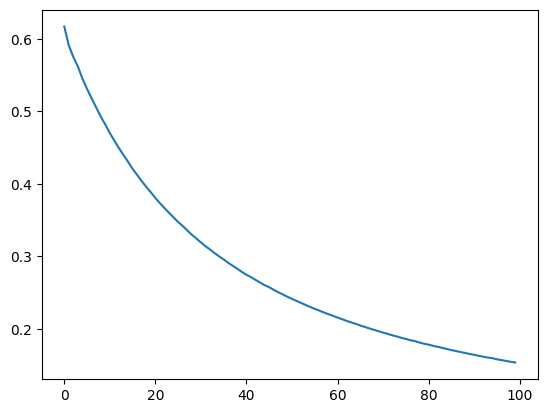

In [226]:
plt.plot(Loss)
plt.show()

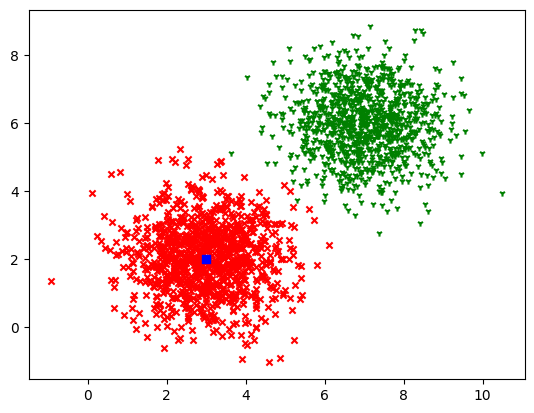

1/1 [==============================] - 0s 92ms/step


array([[0.1485589]], dtype=float32)

In [227]:
x=3.0
y=2.0
plt.scatter(x_label1, y_label1, c='r', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='1', s=20)
plt.scatter(x,y,c='b', marker='s')
plt.show()
model.predict([[x,y]])

##Najlepszy model

In [248]:
model = Sequential()

In [249]:
model.add(Dense(units = 1, use_bias=True, input_dim=2, activation = "sigmoid"))

In [250]:
opt = tf.keras.optimizers.Adam(learning_rate=0.1)
#opt = tf.keras.optimizers.SGD(learning_rate=0.1)

In [251]:
model.compile(loss='binary_crossentropy',optimizer=opt)

In [252]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [253]:
xs[0:10].reshape(-1,1)

array([[3.6552444 ],
       [4.48335868],
       [3.16803826],
       [2.83961866],
       [1.8784655 ],
       [3.45971985],
       [2.71106667],
       [3.16673227],
       [4.60943899],
       [4.46992573]])

In [254]:
xs=xs.reshape(-1,1)
ys=ys.reshape(-1,1)
data_points=np.concatenate([xs,ys],axis=1)
data_points

array([[3.6552444 , 1.76714728],
       [4.48335868, 3.05201951],
       [3.16803826, 2.91245684],
       ...,
       [7.30751572, 5.85924988],
       [6.92047086, 6.74493881],
       [7.56260447, 4.96002013]])

In [255]:
epochs = 150
h = model.fit(data_points,labels, verbose=1, epochs=epochs,batch_size=150)

Epoch 1/150
14/14 [==============================] - 1s 2ms/step - loss: 0.8209
Epoch 2/150
14/14 [==============================] - 0s 2ms/step - loss: 0.4663
Epoch 3/150
14/14 [==============================] - 0s 2ms/step - loss: 0.3117
Epoch 4/150
14/14 [==============================] - 0s 2ms/step - loss: 0.2350
Epoch 5/150
14/14 [==============================] - 0s 2ms/step - loss: 0.1891
Epoch 6/150
14/14 [==============================] - 0s 2ms/step - loss: 0.1597
Epoch 7/150
14/14 [==============================] - 0s 2ms/step - loss: 0.1376
Epoch 8/150
14/14 [==============================] - 0s 2ms/step - loss: 0.1207
Epoch 9/150
14/14 [==============================] - 0s 2ms/step - loss: 0.1074
Epoch 10/150
14/14 [==============================] - 0s 2ms/step - loss: 0.0969
Epoch 11/150
14/14 [==============================] - 0s 2ms/step - loss: 0.0878
Epoch 12/150
14/14 [==============================] - 0s 2ms/step - loss: 0.0805
Epoch 13/150
14/14 [=================

In [256]:
Loss = h.history['loss']
Loss

[0.8208672404289246,
 0.4662627875804901,
 0.31174346804618835,
 0.2350199669599533,
 0.18913517892360687,
 0.15970155596733093,
 0.13760653138160706,
 0.12073840945959091,
 0.10744129866361618,
 0.09690782427787781,
 0.08776033669710159,
 0.08050090074539185,
 0.0739886537194252,
 0.0686570331454277,
 0.06417418271303177,
 0.06031668558716774,
 0.056555021554231644,
 0.0535614974796772,
 0.05056609585881233,
 0.04794805869460106,
 0.04576094448566437,
 0.043688997626304626,
 0.04216144606471062,
 0.039902761578559875,
 0.038292285054922104,
 0.03687968850135803,
 0.035480838268995285,
 0.0342506505548954,
 0.033049337565898895,
 0.03199729695916176,
 0.031094498932361603,
 0.030346347019076347,
 0.029080884531140327,
 0.0282036941498518,
 0.027436072006821632,
 0.026734724640846252,
 0.026083659380674362,
 0.025690369307994843,
 0.024872729554772377,
 0.02414797618985176,
 0.02362240105867386,
 0.023494886234402657,
 0.02326633781194687,
 0.022568058222532272,
 0.022023046389222145,
 

In [257]:
weights = model.get_weights()

print(weights[0])
print(weights[1])    #bias

[[2.0660715]
 [2.3702705]]
[-20.011349]


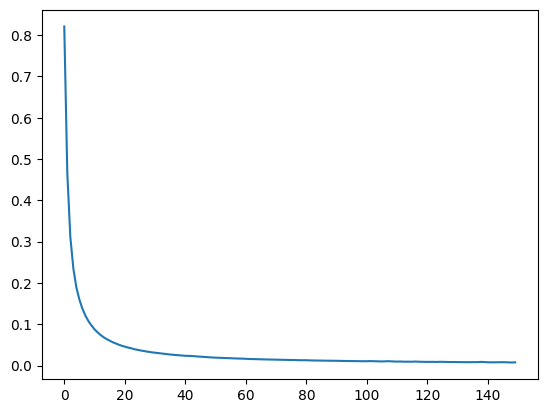

In [258]:
plt.plot(Loss)
plt.show()

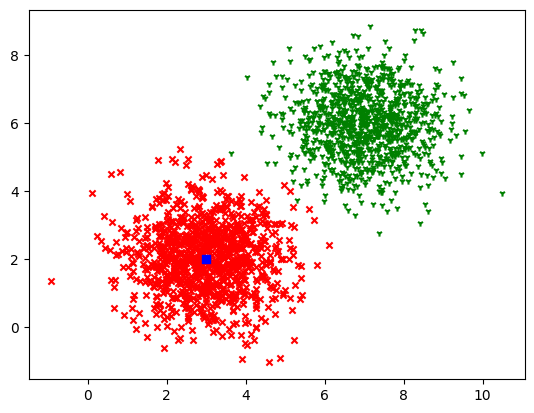

1/1 [==============================] - 0s 101ms/step


array([[0.00011476]], dtype=float32)

In [259]:
x=3.0
y=2.0
plt.scatter(x_label1, y_label1, c='r', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='1', s=20)
plt.scatter(x,y,c='b', marker='s')
plt.show()
model.predict([[x,y]])

Na uczenie modelu ma najwiekszy wpływ użycie batcha (bez batcha jest podawany cały zbiór uczący), dzięki temu wprowadza, że pewną losowość w procesie uczenia, pomoga to uniknąć utknięcia w minimach lokalnych. Model uczony z minibatchem osiąga lepsze rezultaty jeżeli chodzi o wyniki uczenia(szybszy spadek funkcji błędu oraz mniejszy błąd). Model lepiej i szybciej się uczy gdy mini-batch jest większy niż gdy jest on mniejszy.

Ponadto na proces uczenia modelu ma wpływ ilość epok.
Za mała ilość epok skutkuje niedouczeniem modelu (model nie nauczył się wystarczająco dobrze dostosowywać się do danych treningowych).
Ostatnim sprawdzonym przeze mnie parametrem jest współczynnik uczenia. Po przestawieniu na współczynnik Adam model uczy się lepiej
Jego zbyt duża wartość rowadzi do skakania wokół minimum globalnego przy czym model go nie osiągnie. W przypadku zastosowania zbyt małej wartości współczynnika uczenia proces uczenia jest bardzo wolny na przełomie epok.

##Wersja ze zbiorami treningowym i walidacyjnym

Wartości domyślne

In [240]:
model = Sequential()

In [241]:
model.add(Dense(units = 1, use_bias=True, input_dim=2, activation = "sigmoid"))

In [242]:
#opt = tf.keras.optimizers.Adam(learning_rate=0.1)
opt = tf.keras.optimizers.SGD(learning_rate=0.1)

In [243]:
model.compile(loss='binary_crossentropy',optimizer=opt)
#model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])

In [244]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [245]:
epochs = 100
h = model.fit(data_points,labels,validation_split=0.2,verbose=1, epochs=epochs,batch_size=100)

Epoch 1/100
16/16 [==============================] - 0s 11ms/step - loss: 0.6407 - val_loss: 0.3495
Epoch 2/100
16/16 [==============================] - 0s 5ms/step - loss: 0.5582 - val_loss: 0.3706
Epoch 3/100
16/16 [==============================] - 0s 4ms/step - loss: 0.5120 - val_loss: 0.3927
Epoch 4/100
16/16 [==============================] - 0s 4ms/step - loss: 0.4720 - val_loss: 0.3314
Epoch 5/100
16/16 [==============================] - 0s 4ms/step - loss: 0.4375 - val_loss: 0.2960
Epoch 6/100
16/16 [==============================] - 0s 5ms/step - loss: 0.4090 - val_loss: 0.3160
Epoch 7/100
16/16 [==============================] - 0s 5ms/step - loss: 0.3819 - val_loss: 0.3943
Epoch 8/100
16/16 [==============================] - 0s 4ms/step - loss: 0.3594 - val_loss: 0.2587
Epoch 9/100
16/16 [==============================] - 0s 4ms/step - loss: 0.3380 - val_loss: 0.2489
Epoch 10/100
16/16 [==============================] - 0s 5ms/step - loss: 0.3204 - val_loss: 0.2226
Epoch 11

In [246]:
h.history.keys()

dict_keys(['loss', 'val_loss'])

In [247]:
Loss = h.history['loss']
Val_loss = h.history['val_loss']

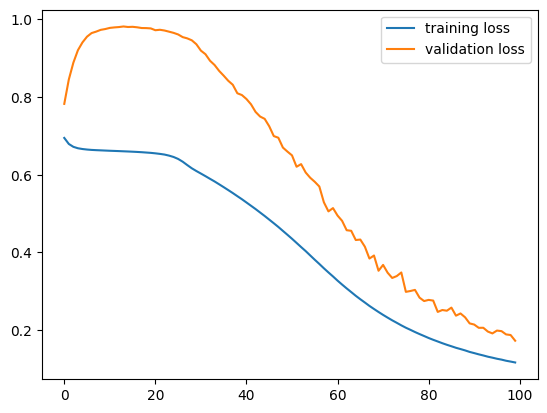

In [124]:
plt.plot(Loss,label="training loss")
plt.plot(Val_loss,label="validation loss")
plt.legend()
plt.show()

#Validation_split 0.6

In [260]:
model = Sequential()

In [261]:
model.add(Dense(units = 1, use_bias=True, input_dim=2, activation = "sigmoid"))

In [262]:
#opt = tf.keras.optimizers.Adam(learning_rate=0.1)
opt = tf.keras.optimizers.SGD(learning_rate=0.1)

In [263]:
model.compile(loss='binary_crossentropy',optimizer=opt)
#model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])

In [264]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [265]:
epochs = 100
h = model.fit(data_points,labels,validation_split=0.6,verbose=1, epochs=epochs,batch_size=100)

Epoch 1/100
8/8 [==============================] - 1s 28ms/step - loss: 0.1771 - val_loss: 5.1026
Epoch 2/100
8/8 [==============================] - 0s 9ms/step - loss: 0.0725 - val_loss: 6.3832
Epoch 3/100
8/8 [==============================] - 0s 9ms/step - loss: 0.0481 - val_loss: 7.2038
Epoch 4/100
8/8 [==============================] - 0s 9ms/step - loss: 0.0367 - val_loss: 7.8137
Epoch 5/100
8/8 [==============================] - 0s 8ms/step - loss: 0.0299 - val_loss: 8.3005
Epoch 6/100
8/8 [==============================] - 0s 8ms/step - loss: 0.0254 - val_loss: 8.7069
Epoch 7/100
8/8 [==============================] - 0s 8ms/step - loss: 0.0222 - val_loss: 9.0555
Epoch 8/100
8/8 [==============================] - 0s 8ms/step - loss: 0.0198 - val_loss: 9.3615
Epoch 9/100
8/8 [==============================] - 0s 7ms/step - loss: 0.0179 - val_loss: 9.6346
Epoch 10/100
8/8 [==============================] - 0s 8ms/step - loss: 0.0163 - val_loss: 9.8810
Epoch 11/100
8/8 [==========

In [266]:
h.history.keys()

dict_keys(['loss', 'val_loss'])

In [267]:
Loss = h.history['loss']
Val_loss = h.history['val_loss']

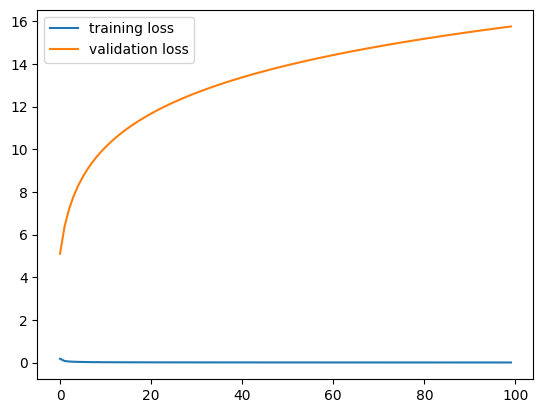

In [268]:
plt.plot(Loss,label="training loss")
plt.plot(Val_loss,label="validation loss")
plt.legend()
plt.show()

#Validation_split 0.1

In [269]:
model = Sequential()

In [270]:
model.add(Dense(units = 1, use_bias=True, input_dim=2, activation = "sigmoid"))

In [271]:
#opt = tf.keras.optimizers.Adam(learning_rate=0.1)
opt = tf.keras.optimizers.SGD(learning_rate=0.1)

In [272]:
model.compile(loss='binary_crossentropy',optimizer=opt)
#model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])

In [273]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [274]:
epochs = 100
h = model.fit(data_points,labels,validation_split=0.1,verbose=1, epochs=epochs,batch_size=100)

Epoch 1/100
18/18 [==============================] - 1s 10ms/step - loss: 0.8005 - val_loss: 0.4028
Epoch 2/100
18/18 [==============================] - 0s 4ms/step - loss: 0.5763 - val_loss: 0.2486
Epoch 3/100
18/18 [==============================] - 0s 3ms/step - loss: 0.5058 - val_loss: 0.2233
Epoch 4/100
18/18 [==============================] - 0s 5ms/step - loss: 0.4576 - val_loss: 0.2394
Epoch 5/100
18/18 [==============================] - 0s 3ms/step - loss: 0.4234 - val_loss: 0.2262
Epoch 6/100
18/18 [==============================] - 0s 3ms/step - loss: 0.3884 - val_loss: 0.2444
Epoch 7/100
18/18 [==============================] - 0s 4ms/step - loss: 0.3627 - val_loss: 0.2502
Epoch 8/100
18/18 [==============================] - 0s 3ms/step - loss: 0.3393 - val_loss: 0.2396
Epoch 9/100
18/18 [==============================] - 0s 5ms/step - loss: 0.3191 - val_loss: 0.1846
Epoch 10/100
18/18 [==============================] - 0s 3ms/step - loss: 0.3015 - val_loss: 0.1989
Epoch 11

In [275]:
h.history.keys()

dict_keys(['loss', 'val_loss'])

In [276]:
Loss = h.history['loss']
Val_loss = h.history['val_loss']

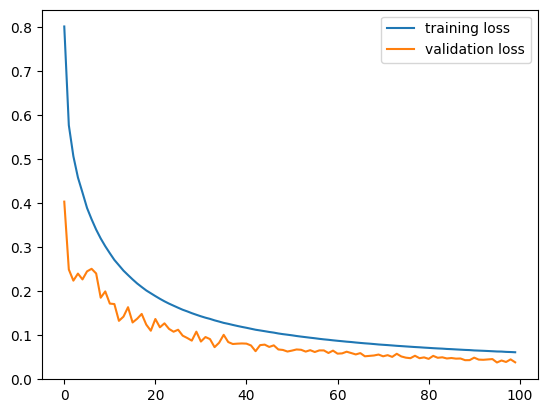

In [277]:
plt.plot(Loss,label="training loss")
plt.plot(Val_loss,label="validation loss")
plt.legend()
plt.show()

Parametr validation split split mówi ile zbioru danych będzie przeznaczone na zbiór validacyjny a ile na zbiór treningowy. im większa wartość validation_split tym mniejszy jest zbiór treningowy. Powyższe wykresy pokazują, ze w wypadku użycia dużego zbioru validacyjnego(validation_split 0.6) model ma problemy się nauczyć.